# Linear Regression Multiple Variables
### Sample problem of predicting home price in monroe, new jersey (USA):
We have a dataset `homeprices.csv` that contain home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years).    
Given these prices we have to predict prices of new homes based on area, bed rooms and age.     
<b>Note </b>: <i> Here area, bedrooms, age are called <b>'independent variables'</b> or <b>'features'</b> whereas price is a <b>'dependent variable'</b>.</i>

### In this implementation we will try to solve the following problem:
* Given these home prices `homeprices.csv` find out price of a home that has:
    - 3000 sqr ft area, 3 bedrooms, 40 year old
    - 2500 sqr ft area, 4 bedrooms, 5 year old

### We will use regression with multiple variables here. Price can be calculated using following equation: [{equation_resource}](https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/equation.jpg)
![equation](../img/equation.jpg)

In [1]:
# importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Load and display our training dataset as a pandas dataframe:
df = pd.read_csv("../data/homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#### Before applying any machine learning algorithm, it is crucial to carefully analyze and convert raw data into a clean dataset. This process, known as Data Preprocessing, involves preparing and transforming raw data to make it suitable for a machine learning model. This step ensures the dataset is clean, consistent, and suitable for training. 

## Data preprocessing is a crucial step in ML workflows for several key reasons:
1. Quality: ML models are only as good as the data they learn from.
2. Consistency: Raw data often contains inconsistencies, missing values, irrelevant features, and noise which can negatively impact model performance.
3. Performance: Clean, standardized data improves model accuracy,efficiency, training speed, and reliability of the machine learning models.
4. Reliability: Preprocessing helps prevent common issues like outliers and biased results.

## Key preprocessing steps:
- Handle missing values
- Remove duplicates
- Scale/normalize features
- Encode categorical variables
- Handle outliers
- Feature selection/engineering


### Proper Data preprocessing ensures the dataset is clean, well-structured, and ready for analysis, leading to more reliable and accurate predictions, making it the foundation of any successful machine learning pipeline.
### Without proper preprocessing, models may learn incorrect patterns or fail to learn at all.


When looking at our datset and trying to analyze it, we can come up with several pieces of information:
- We can notice Missing values in the bedrooms column.
- As the area increases, the price increases (Direct Proportional Relationship).
- As the number of bedrooms increases, the price increases (Direct Proportional Relationship).
- As the age of the home increases, the price decreases (Inverse proportional relationship).

# Data Preprocessing: Handle missing values (e.g., fill NaN with the median, or fill NaN with the mean)
### filling Nan with median:   
* #### Median formula:  [{Formula_reference}](https://www.onlinemathlearning.com/median.html)   
![Median formula](../img/median.png)

* #### To caluclate median in the bedrooms column: {3.0, 4.0, 3.0, 5.0, 6.0}
    - First arrange the point values in an ascending order (or descending order): {3, 3, 4, 5, 6}
    - n: number of of point values is 5, an odd number. Hence, the median is the value in the middle position.
    - Median position = (5+1)/2 = 3.
    - Median = 4.

In [3]:
median_value = df.bedrooms.median()
median_value

4.0

In [4]:
# fill NaN with the median:
# Create copy of our dataframe to demonstrate filling with median
df_to_fill_with_median = df.copy()
# fill the dataframe with median value
df_to_fill_with_median.bedrooms = df_to_fill_with_median.bedrooms.fillna(median_value)
df_to_fill_with_median

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### filling Nan with mean:   
* #### mean definiton: The "average" number; found by adding all data points and dividing by the number of data points.
* #### To find the mean average value or ‘arithmetic mean’, you must first add up all the given data points and divide the sum by the number of data points (or number of numbers) in total.
* #### Mean formula: [{Formula_reference}](https://www.mathnasium.com/blog/what-is-mean-in-math)   
![Mean formula](../img/mean.png)   


* #### To caluclate mean in the bedrooms column: {3.0, 4.0, 3.0, 5.0, 6.0}
    - First add up all the given data points: 3 + 4 + 3 + 5 + 6 = 21
    - Divide the sum by the number of data points (5) ==> 21/ 5
    - Mean = (3 + 4 + 3 + 5 + 6)/5 = 21/ 5 = 4.2.

In [5]:
mean_value = df['bedrooms'].mean()
mean_value

4.2

In [6]:
# Since we calculate the number of bedrooms, It can't be a decimal number (we need to keep it integer):
mean_value = int(mean_value)
mean_value

4

In [7]:
# fill NaN with the mean:
# Create copy of our dataframe to demonstrate filling with median
df_to_fill_with_mean = df.copy()
# fill the dataframe with median value
df_to_fill_with_mean.bedrooms = df_to_fill_with_mean.bedrooms.fillna(mean_value)
df_to_fill_with_mean

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
# Now we understand how we can handle missing values, let's apply the 'median approach' on our datset, 
# So we can move to next step (fit and train linear model)
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Visualize how the independent variables (area, bedrooms, age) affect the price in our dataset

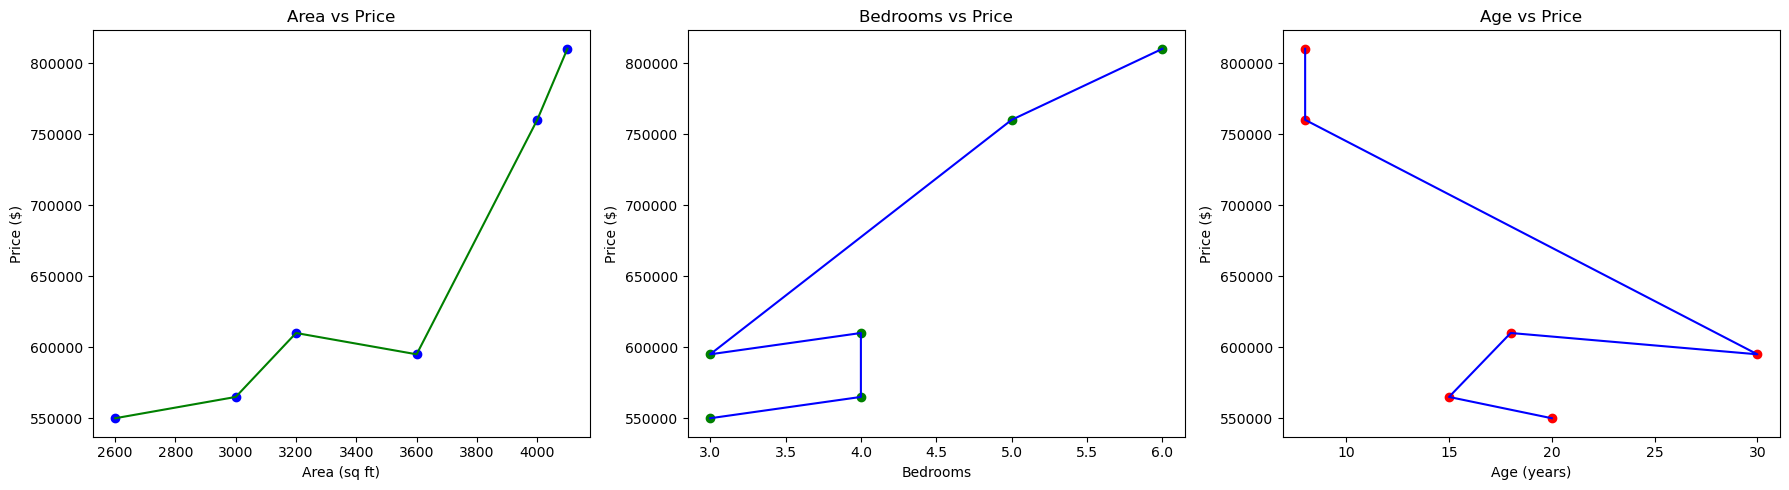

In [9]:
# Create subplots for each independent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot area vs price
axes[0].scatter(df['area'], df['price'], color='blue', label="Data Points")
axes[0].plot(df['area'], df['price'], color='green', label="Line of Best Fit")
axes[0].set_title('Area vs Price')
axes[0].set_xlabel('Area (sq ft)')
axes[0].set_ylabel('Price ($)')


# Plot bedrooms vs price
axes[1].scatter(df['bedrooms'], df['price'], color='green', label="Data Points")
axes[1].plot(df['bedrooms'], df['price'], color='blue', label="Line of Best Fit")
axes[1].set_title('Bedrooms vs Price')
axes[1].set_xlabel('Bedrooms')
axes[1].set_ylabel('Price ($)')

# Plot age vs price
axes[2].scatter(df['age'], df['price'], color='red', label="Data Points")
axes[2].plot(df['age'], df['price'], color='blue', label="Line of Best Fit")
axes[2].set_title('Age vs Price')
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('Price ($)')

# Display the plots
plt.tight_layout() # Ensures that the subplots do not overlap.
plt.show()

### Fitting and training our model using our training dataset `homeprices.csv`

In [10]:
model = linear_model.LinearRegression()
model.fit(df[['area', 'bedrooms', 'age']].values, df.price.values)

LinearRegression()

In [11]:
coefficients = model.coef_
print("m1 =", coefficients[0])
print("m2 =", coefficients[1])
print("m3 =", coefficients[2])

m1 = 112.06244194213465
m2 = 23388.880077939182
m3 = -3231.717908632958


In [12]:
intercept = model.intercept_
print("b =",intercept)

b = 221323.00186540384


In [13]:
# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
model.predict([[3000, 3, 40]])

array([498408.25158031])

In [14]:
# Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old
model.predict([[2500, 4, 5]])

array([578876.03748933])

In [15]:
## how the model predict the value:
# area * m1 + bedrooms * m2 + age * m3 + b
prediction = 2500*coefficients[0] + 4*coefficients[1] + 5*coefficients[2] + intercept
print(prediction) 

578876.0374893325
